# Datos del alumno

**Nombre**:


**Apellidos**:


**Grupo:**

# Introducción.

En este ejemplo vamos a trabajar con un conjunto de datos formado por un total de 14999 observaciones y 10 variables, consistente en estudiar diversas características de los empleados de una empresa en relación con su decisión de abandonar o no la empresa. Las variables en estudio, se van a describir posteriormente.


# Estudio descriptivo de los datos.

En este apartado vamos a familiarizarnos con la estructura que toman estos datos, así como con las diversas características de los mismos y posibles relaciones entre ellos.

Lo primero que hacemos es importar las librerías que vamos a necesitar y los datos en cuestión.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [3]:
#Descarga manual: https://drive.google.com/file/d/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK/view?usp=sharing
#Descargamos los ficheros de Google Drive
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK' -O 'Rotacion_empleados.csv'

--2023-07-07 10:05:51--  https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK
Resolving drive.google.com (drive.google.com)... 172.253.115.139, 172.253.115.102, 172.253.115.100, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ne59r7l2u0t1gmprnibmltdbgu8htjr6/1688724300000/14644984037434537262/*/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK?e=download&uuid=c951d5c6-9008-42f4-b518-555cc4342716 [following]
--2023-07-07 10:05:52--  https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ne59r7l2u0t1gmprnibmltdbgu8htjr6/1688724300000/14644984037434537262/*/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK?e=download&uuid=c951d5c6-9008-42f4-b518-555cc4342716
Resolving doc-08-b0-docs.googleusercontent.com (doc-08-b0-docs.googleusercontent.com)... 142.251.163.132, 

Si no conseguís descargar el fichero con el anterior comando, también lo tenéis a vuestra disposición en los **Recursos del proyecto** con el nombre `Rotacion_empleados.csv`.

In [4]:
# Leemos el conjunto de datos
datos = pd.read_csv("Rotacion_empleados.csv")

In [5]:
# obtenemos las filas y columnas qu contiene
datos.shape

(14999, 10)

In [6]:
# Veamos los primeros datos
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
#obtenemos información sobre las variables que contiene este data set
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Significado y contenido de las variables.

* **satisfaction_level**: Es el nivel de satisfacción de los empleados, que va de 0-1.

* **last_evaluation**: Se evalúa el desempeño por parte del empleador, el cual también va de 0-1..

* **number_projects**: ¿Cual es el  número de proyectos asignados a un empleado?

* **average_monthly_hours**: ¿Cuántas horas promedio trabaja un empleado en un mes?

* **time_spent_company**: significa experiencia del empleado. Número de años de permanencia de un empleado en la empresa.

* **work_accident**: si un empleado ha tenido un accidente de trabajo o no.

* **promotion_last_5years**: si un empleado ha tenido una promoción en los últimos 5 años o no..

* **sales**: departamento/división a la que pertenece el empleado.

* **Salary**: Nivel salarial del empleado en los niveles:low, medium and high.

* **left**: Si el empleado ha dejado la empresa o no. (0: No, 1: Sí)

Observemos que la variable con denominación "sales" no expresa adecuadamente el contenido de la variable, quizá sea más procedente denominarla `department`, que es lo que hacemos a continuación.

In [8]:
datos.rename(columns={'sales': 'department'}, inplace=True)
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Sprint 1

## Análisis descriptivo de los datos

Antes de iniciar la construcción de cualquier modelo de Machine Learning, es primordial realizar un análisis exploratorio que nos permita familiarizarnos con los datos y extraer las primeras conclusiones de los mismos.


### Ejemplo

Evaluamos el porcentaje de empleados que pertenencen a cada uno de los departamentos (variable que anteriormente se llamaba `sales`y ahora se llama `department`).

In [ ]:
datos.department.value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

Los datos anteriores en formato de gráfico, los obtendremos de la siguiente manera:

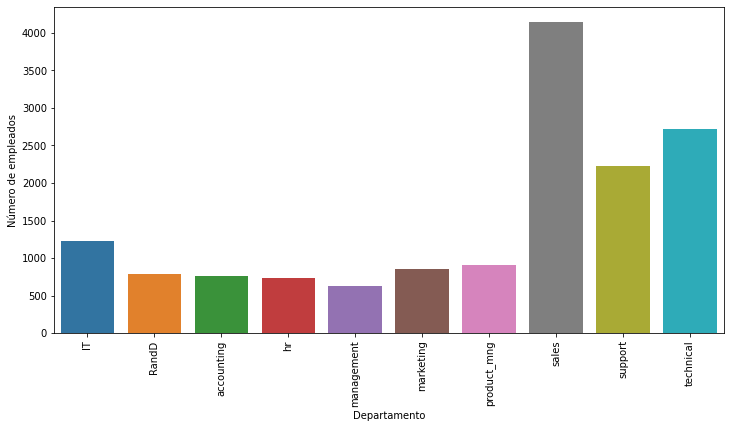

In [ ]:
plt.figure(figsize=(12,6))
data_group = datos.groupby(by=['department'],as_index=False).count()
ax = sns.barplot(x="department", y="left", data=data_group)
ax.set(xlabel='Departamento', ylabel='Número de empleados')

plt.xticks(rotation = 90);

Podemos ver que casi un 30% de los empleados presentes en la muestra pertenecen al departamento de ventas.

## CUESTION 1

**¡Ahora es tu turno! Responde a las siguientes preguntas con los gráficos que consideres más adecuados y su explicación correspondiente:**


1.   Si queremos predecir si un empleado abandona o no la empresa, ¿estamos ante un problema de clases balanceado o desbalanceado? Justifica tu respuesta incluyendo un gráfico que represente el número observaciones en cada una de las clases.


2.   Estudiar cómo se ditribuye la variable `left`en función de los siguientes atributos categóricos: `number_project`,`time_spend_company`,`Work_accident`,`department`, `promotion_last_5years`,`salary`.

Os facilito una serie de enlaces que os pueden servir de inspiración para realizar esta parte:



*   [Introducción a la estadística descriptiva](https://deepnote.com/@anthonymanotoa/Apuntes-de-Estadistica-Descriptiva-cfa882b6-c07f-43fe-9901-1c2e471ce120): Para aquellos que de seen introducirse a la analítica descriptiva desde cero.
*   [Análisis de datos categóricos con Python](https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/): Enfocado en el estudio de variables categóricas.
*   [Análisis exploratorio de datos con Python](https://www.kaggle.com/code/abonaplata/analisis-exploratorio-de-datos-con-python#AN%C3%81LISIS-EXPLORATORIO-DE-DATOS-CON-PYTHON): Estudia la relación entre variables categóricas y variables continuas.

Sin embargo, éstos no dejan de ser unos de los muchos ejemplos sobre cómo realizar el análisis exploratorio, así que tenéis total libertad para explorar y realizar cualquier análisis adicional que se os ocurra.

## Análisis predictivo

### Preparación de los datos

Lo primero de todo, vamos a ver el tipo de variables con las que estamos trabajando.

In [9]:
datos.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

Podemos observar que hay algunas variables que son de tipo categórico con categorías en formato literal (`object`). Como hemos visto en la teoría, hay algunos modelos que no admiten esta codificación de las categorías, por lo que las transformamos a formato numérico.

La variable `salary`(salario) sí que podemos considerarla como de tipo ordinal. Sin embargo, esto no aplica a la variable `department`. A esta variable habrá que transformarla en variables de tipo dummy.

## CUESTION 2



*   Transformar la variable `salary` de forma que sus categorías se codifiquen de la siguiente manera: low = 0, medium = 1 y high = 2.
*   Transformar la variable `department` en variables dummies.


Puedes volver a revisar el vídeo de la Clase 1 Tema 4 - **Laboratorio Preprocesamiento de datos: parte 2**, donde a partir del minuto 5:55 se explica en detalle cómo proceder en estos casos.

### Implementación de los modelos

Es importante tener en cuenta que estamos ante un problema de clasifiación binaria (0: No abandona, 1: Sí abandona). Por lo tanto, de entre los 4 diferentes algoritmos que hemos visto esta semana **sólo podemos aplicar 2**
, ¿cuáles son?

En los vídeos de los laboratorios podéis encontrar una carpeta con los **recursos** de apoyo que contiene un ejemplo paso a paso sobre cómo implementar estos modelos en Python. Os animo a entenderlos bien y tratar de seguir el mismo procedimiento para estos datos.

**IMPORTANTE**: Recordad que antes de entrenar un modelo es clave particionar los datos en, al menos, dos conjuntos diferentes: uno para entrenar el modelo (train) y otro para evaluar su capacidad predictiva (test).

En este caso, empleamos el parámetro `stratify=y` para garantizar que la proporción de observaciones de la variable `left` se mantenga tanto en la partición de train como en la de test. Es decir, en ambas particiones conservamos aproximadamente la proporción de 24% observaciones de la categoría *Sí* y el 76% restante de la categoría *No*.

## CUESTION 3

Con las premisas anteriores obtener los conjuntos de train y test, de manera que el tamaño del conjunto del **test tenga el 20% de observaciones** sobre el conjunto total, y utilizando el parámetro **random_state=123**.

*NOTA*. Para que la celda posterior en la que guardamos los datos funcione, recomendamos llamar a los conjuntos de train y test resultantes de la siguiente manera: `X_train`, `X_test`, `y_train`, `y_test`.

In [ ]:
from sklearn.model_selection import train_test_split


Estos conjuntos de entrenamiento y test los vamos a utilizar tal cual en futuros sprint, así que los guardamos de la siguiente manera:

In [ ]:
np.save("X_train",X_train)
np.save("X_test",X_test)
np.save("y_train",y_train)
np.save("y_test",y_test)

*NOTA*. Los ficheros anteriores se guardan con la extensión .npy, y así por ejemplo tendremos el fichero "X_train.npy", etc.

Si queréis conservar estas matrices, es imporante que descarguéis a vuestro PC estos archivos generados antes de cerrar la sesión de Google Colab para evitar perderlos. Sin embargo, si no lo hacéis no pasa nada, ya que en los siguientes sprints se os dará como input.

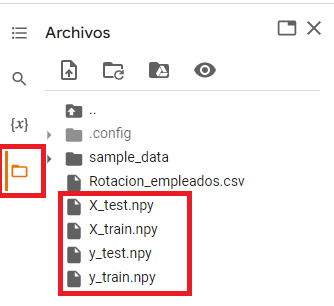

#### Carga de los conjuntos de train y test


En el anterior apartado hemos guardado los conjuntos de entrenamiento y test (son objetos de tipo np.array). Lo que deberemos hacer en los diferentes pasos tanto de este sprint como de los siguientes es recuperar estos datos para trabajar con ellos. Lo haremos con la siguiente instrucción:

In [ ]:
# Si no conseguís ejecutar los datos anteriores podeis descomentar las siguientes instrucciones para obtener las matrices resultantes

##Descarga manual: https://drive.google.com/file/d/1S7DtU2HEFXkqyJp_RcILNSgEsY3huIL9/view?usp=sharing
##Descarga manual: https://drive.google.com/file/d/1O1BRGwSd81TOOpaQvoo5BHDsrPEruz93/view?usp=sharing
##Descarga manual: https://drive.google.com/file/d/1u3yI5L_2YI77uF_WT9ysIzw8dydVlQSh/view?usp=sharing
##Descarga manual: https://drive.google.com/file/d/1eWo_m2gbihSuUQeOhH8I8Q0uudluQKBT/view?usp=sharing


##Descargamos los ficheros de Google Drive (si lo ejecutais en un entorno diferente a Google Colab, tenéis que intalar previamente wget en vuestro PC)
#!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1S7DtU2HEFXkqyJp_RcILNSgEsY3huIL9' -O 'y_train.npy'
#!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1O1BRGwSd81TOOpaQvoo5BHDsrPEruz93' -O 'y_test.npy'
#!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1u3yI5L_2YI77uF_WT9ysIzw8dydVlQSh' -O 'X_train.npy'
#!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1eWo_m2gbihSuUQeOhH8I8Q0uudluQKBT' -O 'X_test.npy'

In [ ]:
X_train, X_test,y_train,y_test = np.load("X_train.npy"),np.load("X_test.npy"),np.load("y_train.npy"),np.load("y_test.npy")

De esta manera ya estaremos dispuestos en este sprint y en los de las siguientes semanas a trabajar con estos conjuntos de datos.

Ahora procedemos a entrenar los modelos vistos durante esta semana adecuados para predecir la variables `left`.

## CUESTION 4

**Entrenar con los datos de train y evaluar sobre datos de test dos de los algoritmos vistos en la lección para predecir si un empleado se va a ir o no de la empresa.**

#### Modelo 1

#### Modelo 2

## CUESTION 5

**Analizar, discutir y comparar los resultados obtenidos por cada uno de los modelos y dejar reflejadas las conclusiones obtenidas en el notebook que se entregue.**

El entrenamiento del modelo por sí solo no nos aporta una información relevante, sino que es igual de importante saber interpretar los resultados obtenidos. Es fundamental a investigar otras métricas aparte del accuracy, para saber si el modelo se comporta igual de bien para predecir ambas clases. Unos ejemplos podían ser:

*   Matriz de confusión.
*   Recall, precision, f1-score, etc. -`classification_report()`.
*   [Curva ROC y AUC](https://mlu-explain.github.io/roc-auc/) - [`RocCurveDisplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay).

.